In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import h5py, os, cv2
import matplotlib.pyplot as plt

In [5]:
# 데이터셋 저장 위치
base_path = 'dataset/original'

# train_data를 받아서 x_train, y_train로 나눠줌
train_data = h5py.File(os.path.join(base_path, 'train_happy.h5'), 'r')
x_train = np.array(train_data['train_set_x'][:])
y_train = np.array(train_data['train_set_y'][:])

# test_data 받아서 x_test, y_test 나눠줌
test_data = h5py.File(os.path.join(base_path, 'test_happy.h5'), 'r')
x_test = np.array(test_data['test_set_x'][:])
y_test = np.array(test_data['test_set_y'][:])

y_train = y_train.reshape((y_train.shape[0], 1)) # (600,) => (600, 1)
y_test = y_test.reshape((y_test.shape[0], 1)) # (150,) => (150, 1)

# 저장
np.save('dataset/x_train_color.npy', x_train)
np.save('dataset/x_test_color.npy', x_test)

# shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(600, 64, 64, 3) (600, 1)
(150, 64, 64, 3) (150, 1)


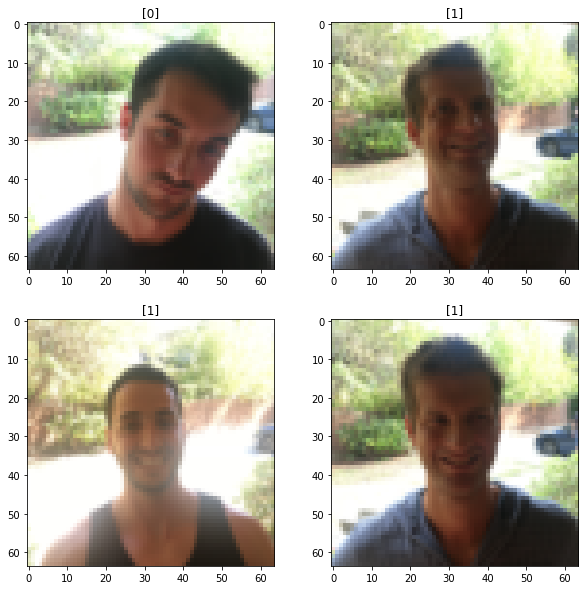

In [7]:
# 데이터 확인
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.title(y_train[0])
plt.imshow(x_train[0])
plt.subplot(2, 2, 2)
plt.title(y_train[1])
plt.imshow(x_train[1])
plt.subplot(2, 2, 3)
plt.title(y_test[0])
plt.imshow(x_test[0])
plt.subplot(2, 2, 4)
plt.title(y_test[1])
plt.imshow(x_test[1])

In [8]:
# 컬러를 유지하는 것이 정확도가 높게 나오지만, 보편적인 상황에서 적용 할 수 있도록 흑백 이미지로 전환
x_result = []
for x in x_train:
    # 흑백으로 전환
    img = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    x_result.append(img)

# np메소드를 사용하기 위해 배열로 변환 후 파일로 저장
x_result = np.array(x_result)
np.save('dataset/x_train.npy', x_result)

x_result = []
for x in x_test:
    # 흑백으로 전환
    img = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    x_result.append(img)

# np메소드를 사용하기 위해 배열로 변환 후 파일로 저장
x_result = np.array(x_result)
np.save('dataset/x_test.npy', x_result)

# y는 변환 없이 그대로 저장
np.save('dataset/y_train.npy', y_train)
np.save('dataset/y_test.npy', y_test)